# HW 1
# Ian Hunt-Isaak
#### Jan 29, 2018


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spopt
import scipy

# Problem 1
### (a)

I made the range [-2,1] so the values of y weren't so huge relative to the variance. I'd aruge that the noise strength can affect what conclusions you can draw from the data. If the noise is large enough it shoudl reduce confidence in your estimate of the underlying function.

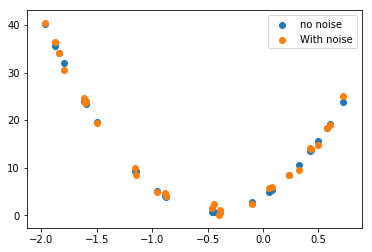

In [2]:
x = np.sort(np.random.uniform(low = -2, high = 1,size = 30))
y = 4+15*x+17*x**2
plt.figure()
plt.scatter(x,y,label='no noise')
variance = .50#.5
y += np.random.normal(loc = 0, scale = np.sqrt(variance),size = 30)
plt.scatter(x,y,label='With noise')
plt.legend()
plt.show()


### (b)

In [3]:
# find L1 line fit
l1_fit = lambda x0, x, y: np.sum(np.abs(x0[0]+x0[1] * x + x0[2]*x**2 - y))
xopt1 = spopt.fmin(func=l1_fit, x0=[3.5, 13, 20], args=(x, y))

# find L2 line fit
l2_fit = lambda x0, x, y: np.sum(np.power(x0[0]+x0[1] * x + x0[2]*x**2 - y, 2))
xopt2 = spopt.fmin(func=l2_fit, x0=[3.5, 13, 20], args=(x, y))

# find L5 line fit
l5_fit = lambda x0, x, y: np.sum(np.power(np.abs(x0[0]+x0[1] * x + x0[2]*x**2 - y), 5))
xopt5 = spopt.fmin(func=l5_fit, x0=[3.5, 13, 20], args=(x, y))


Optimization terminated successfully.
         Current function value: 16.305224
         Iterations: 151
         Function evaluations: 264
Optimization terminated successfully.
         Current function value: 14.108754
         Iterations: 106
         Function evaluations: 192
Optimization terminated successfully.
         Current function value: 20.437220
         Iterations: 106
         Function evaluations: 195


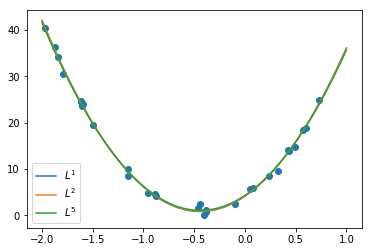

In [4]:
plt.figure()
x_plot = np.linspace(-2,1,100)
plt.plot(x_plot, xopt1[0]+xopt1[1]*x_plot+xopt1[2]*x_plot**2,label=r'$L^1$')
plt.plot(x_plot, xopt2[0]+xopt2[1]*x_plot+xopt2[2]*x_plot**2,label=r'$L^2$')
plt.plot(x_plot, xopt5[0]+xopt5[1]*x_plot+xopt5[2]*x_plot**2,label=r'$L^5$')
plt.scatter(x,y)
plt.legend()
plt.show()

### (c)

In [5]:
y2 = y.copy()
y2[3] += 15
y2[13] -= 20

# find L1 line fit
l1_fit = lambda x0, x, y: np.sum(np.abs(x0[0]+x0[1] * x + x0[2]*x**2 - y))
xopt12 = spopt.fmin(func=l1_fit, x0=[3.5, 13, 20], args=(x, y2))

# find L2 line fit
l2_fit = lambda x0, x, y: np.sum(np.power(x0[0]+x0[1] * x + x0[2]*x**2 - y, 2))
xopt22 = spopt.fmin(func=l2_fit, x0=[3.5, 13, 20], args=(x, y2))

# find L5 line fit
l5_fit = lambda x0, x, y: np.sum(np.power(np.abs(x0[0]+x0[1] * x + x0[2]*x**2 - y), 5))
xopt52 = spopt.fmin(func=l5_fit, x0=[3.5, 13, 20], args=(x, y2))


Optimization terminated successfully.
         Current function value: 48.052631
         Iterations: 134
         Function evaluations: 243
Optimization terminated successfully.
         Current function value: 539.842782
         Iterations: 82
         Function evaluations: 153
Optimization terminated successfully.
         Current function value: 675369.716078
         Iterations: 112
         Function evaluations: 204


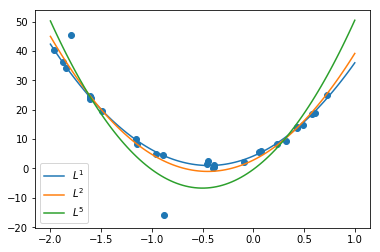

In [6]:
plt.figure()
x_plot = np.linspace(-2,1,100)
plt.plot(x_plot, xopt12[0]+xopt12[1]*x_plot+xopt12[2]*x_plot**2,label=r'$L^1$')
plt.plot(x_plot, xopt22[0]+xopt22[1]*x_plot+xopt22[2]*x_plot**2,label=r'$L^2$')
plt.plot(x_plot, xopt52[0]+xopt52[1]*x_plot+xopt52[2]*x_plot**2,label=r'$L^5$')
plt.scatter(x,y2)
plt.legend()
plt.show()

# Problem 2
### (a)
Trying out several different random number genertors. I will use:  

rand  
randn  
randint  
and, bytes //lol

In [322]:
n=25
m=30


def generate_x_y(num_non_zeros, A):
    x=np.random.rand(m)
    x[np.random.choice(range(m),m-num_non_zeros,replace=False)]=0    
    y=np.matmul(A,x)
    return x,y

def L1_norm(X):
    return np.abs(X).sum()

def L2_norm(X):
    return (X**2).sum()

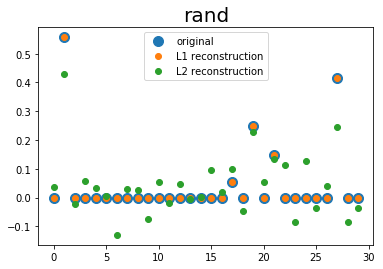

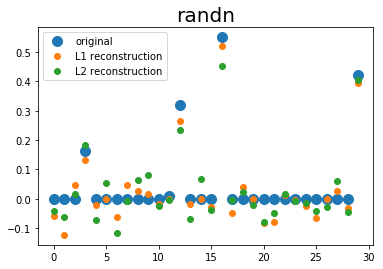

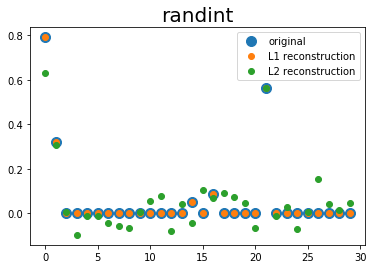

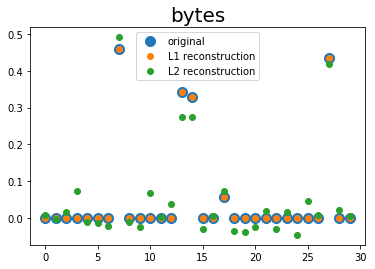

In [338]:
def compressed(A, method_name=''):
    x, y=generate_x_y(5, A)

    r1=spopt.minimize(fun=lambda X: L1_norm(X),x0=0*x,
                      constraints={'type': 'eq',
                                   'fun' : lambda Q: np.matmul(A,Q)-y
                                  })

    r2=spopt.minimize(fun=lambda X: L2_norm(X),x0=0*x,
                      constraints={'type': 'eq',
                                   'fun' : lambda Q: np.matmul(A,Q)-y
                                  })
    plt.figure()
    plt.title(method_name,fontsize=20)
    plt.plot(x,'o',label='original',markersize=10)
    plt.plot(r1.x,'o',label='L1 reconstruction')
    plt.plot(r2.x,'o',label='L2 reconstruction')
    plt.legend()
    plt.show()
compressed(np.random.rand(n,m),'rand')
compressed(np.random.randn(n,m),'randn')
compressed(np.random.randint(low = 0,high= 10,size=(n*m)).reshape(n,m),'randint')
buf = np.random.bytes(m*n)
compressed(np.frombuffer(buf, dtype=np.int8).reshape(n,m),'bytes')


It's really really hard to make L1 reconstruction fail when only a few elements are non zero it turns out.

### b/c Combination $L_1$ and $L_2$

In [266]:
def L_new(X, beta):
    return L2_norm(X) + beta*L1_norm(X)
beta_vals = [0,.5,1]
r_beta = []
for i, beta in enumerate(beta_vals):
    r_beta.append(spopt.minimize(fun=lambda X: L_new(X, beta),x0=0*x,
                  constraints={'type': 'eq',
                               'fun' : lambda Q: np.matmul(A,Q)-y
                              }))

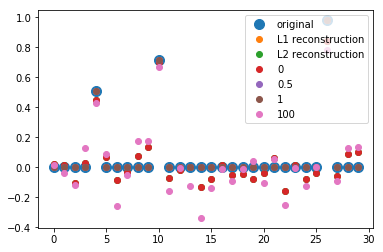

In [264]:
plt.figure()
plt.plot(x,'o',label='original',markersize=10)
plt.plot(r1.x,'o',label='L1 reconstruction')
plt.plot(r2.x,'o',label='L2 reconstruction')
for i,r in enumerate(r_beta):
    plt.plot(r.x,'o',label = beta_vals[i])
plt.gca().legend()
plt.show()

In [268]:
print('Beta = val \t sum(|Orig - Predicted|)')
print('-'*25)
for i,r in enumerate(r_beta):
    print('Beta = {:} \t{:}'.format(beta_vals[i],np.sum(np.abs(x-r.x))))

Beta = val 	 sum(|Orig - Predicted|)
-------------------------
Beta = 0 	1.8839129971339257
Beta = 0.5 	1.764198803913777e-05
Beta = 1 	2.7979014681679405e-06


Ok so now I'll plot the difference between the original and reconstructed for different values of beta

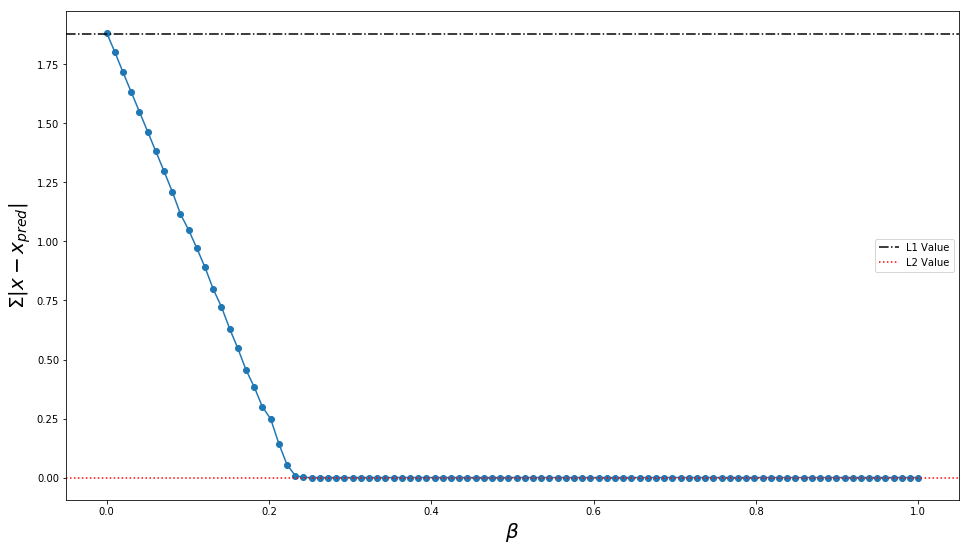

In [296]:
beta_vals = np.linspace(0,1,100)
goodness = np.zeros_like(beta_vals)
r_beta = []
for i, beta in enumerate(beta_vals):
    r_beta.append(spopt.minimize(fun=lambda X: L_new(X, beta),x0=0*x,
                  constraints={'type': 'eq',
                               'fun' : lambda Q: np.matmul(A,Q)-y
                              }))
    goodness[i] = np.sum(np.abs(r_beta[-1].x-x))

plt.figure(figsize=(16,9))
plt.plot(beta_vals, goodness,'o-')
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel(r'$\Sigma |x - x_{pred}|$',fontsize=20)
plt.axhline(1.88,ls='-.',color='black',label='L1 Value')
plt.axhline(0,ls=':',color= 'red',label='L2 Value')
plt.legend()
plt.show()

#### Explanations

I'd say that the characteric beta at which the nature of the solution switches between L1 and L2 is about .2 for a complete switch and and ~.15 for being an even split of the nature of the solutions.


As an interesting side note if I make beta larger than 2 I start to get instabilities in the solution. I think this may be because the loss function doesn't get normalized so the gradients are too extreme for good optimization., You can see this in the plot below

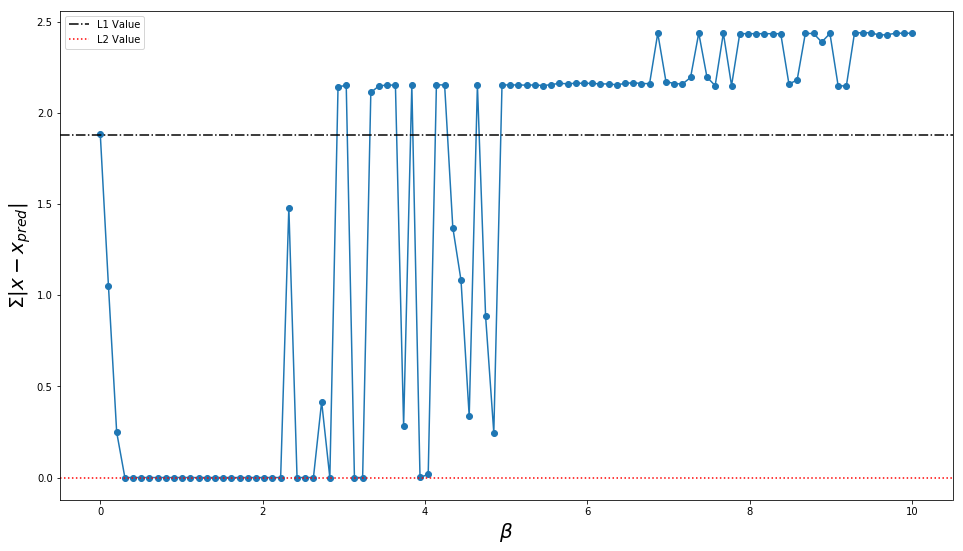

In [294]:
beta_vals = np.linspace(0,10,100)
goodness = np.zeros_like(beta_vals)
r_beta = []
for i, beta in enumerate(beta_vals):
    r_beta.append(spopt.minimize(fun=lambda X: L_new(X, beta),x0=0*x,
                  constraints={'type': 'eq',
                               'fun' : lambda Q: np.matmul(A,Q)-y
                              }))
    goodness[i] = np.sum(np.abs(r_beta[-1].x-x))
plt.figure(figsize=(16,9))
plt.plot(beta_vals, goodness,'o-')
plt.xlabel(r'$\beta$',fontsize=20)
plt.ylabel(r'$\Sigma |x - x_{pred}|$',fontsize=20)
plt.axhline(1.88,ls='-.',color='black',label='L1 Value')
plt.axhline(0,ls=':',color= 'red',label='L2 Value')
plt.legend()
plt.show()


# Problem 3
### (a)

In [7]:
from keras.datasets import cifar10

Using TensorFlow backend.
/home/ianhi/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [9]:
inds=np.array([np.argmax(y_train==[i]) for i in range(10)]) # a list of the indices for label
inds

array([29,  4,  6,  9,  3, 27,  0,  7,  8,  1])

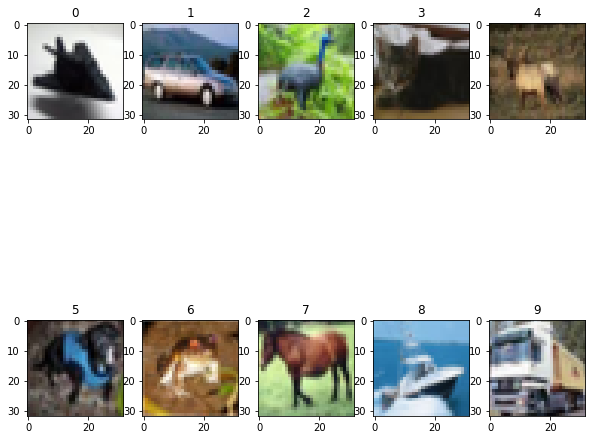

In [10]:
f,ax=plt.subplots(2,5,figsize=(10,10))
ax=ax.flatten()
for i in range(10):
    ax[i].imshow(x_train[inds[i]])
    ax[i].set_title(str(i))
plt.show()

In [11]:
inds=np.array([y_train==[i] for i in range(10)]) # a list of the indices for label
np.sum(inds[0])

5000

In [12]:
y_train.shape
x_train.shape
(y_train==2).shape
x_train[np.squeeze(y_train == 2)].shape

(5000, 32, 32, 3)

### Random Projections
Doesn't help much :(

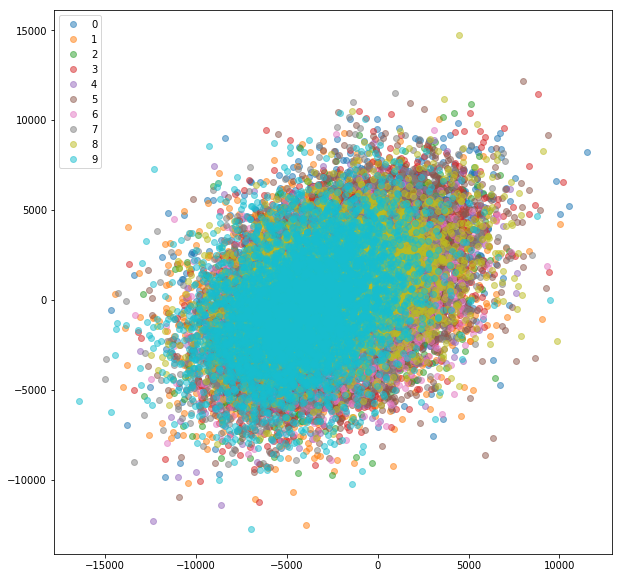

In [14]:
plt.figure(figsize=(10,10))
r1=np.random.randn(32*32*3)
r2=np.random.randn(32*32*3)
for i in range(10):
    plt.plot(np.dot(x_train_flat[np.squeeze(y_train == i)],r1),
             np.dot(x_train_flat[np.squeeze(y_train == i)],r2),
             'o', label=str(i), alpha=0.5)
plt.gca().legend()
plt.show()

### By hand PCA

In [303]:
cov_mat = np.cov(x_train_flat.T)
e_vals, e_vects = scipy.linalg.eigh(cov_mat)

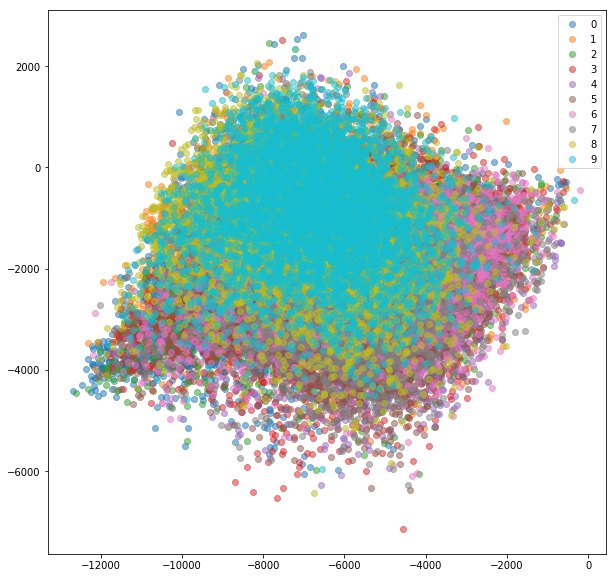

In [304]:
plt.figure(figsize=(10,10))
r1=np.random.randn(32*32*3)
r2=np.random.randn(32*32*3)
for i in range(10):
    plt.plot(np.dot(x_train_flat[np.squeeze(y_train == i)],e_vects[:,-1]),
             np.dot(x_train_flat[np.squeeze(y_train == i)],e_vects[:,-2]),
             'o', label=str(i), alpha=0.5)
plt.gca().legend()
plt.show()

### Reconstructing Images from PCA
I want to get a sense of how much each additional component is giving us. Since I can't visualize more than 3 dimensions I'll accomplish this by reconstructing an image with various numebrs of components (I suppose i'm just doing image compression...). I'll do this first in gray scale because I got that working first when I was messing stuff up and thought it was the fault of the RGB scheme.

In [305]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])



In [306]:
print(x_train.shape)
x_gray = rgb2gray(x_train)
print(x_gray.shape)
x_gray_flat = x_gray.reshape(50000,32*32)
cov_mat_gray = np.cov(x_gray_flat.T)
gray_e_vals, gray_e_vects = scipy.linalg.eigh(cov_mat_gray)

(50000, 32, 32, 3)
(50000, 32, 32)


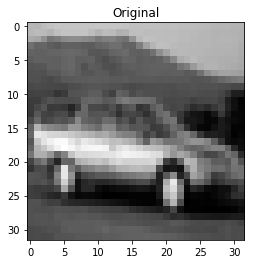

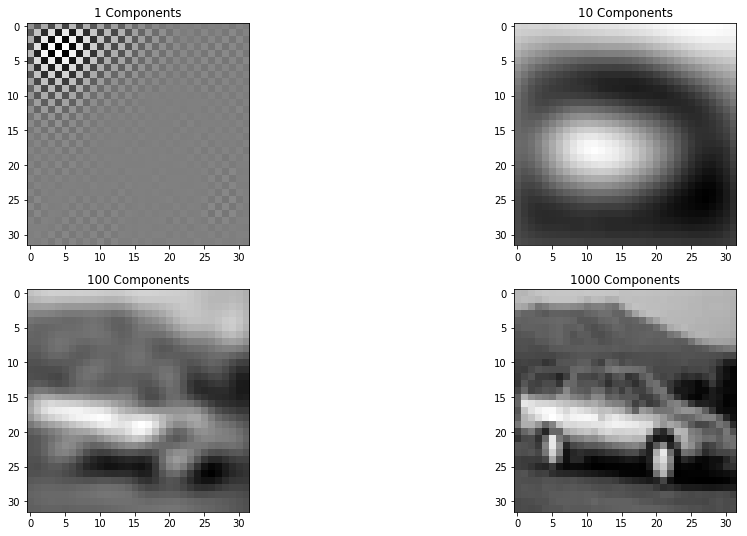

In [307]:
take_vals = [1,10,100,1000]

n_take = 400
shaped = x_gray[4].reshape(32*32)
recon = np.zeros([4,32*32])
for j, n_take in enumerate(take_vals):
    alphas = np.zeros(n_take)

    for i in range(n_take):
        alphas[i] = shaped @ gray_e_vects[:,-i]
        recon[j] = np.add(recon[j], alphas[i] * gray_e_vects[:,-i],casting='unsafe')

plt.imshow(x_gray[4],cmap='gray')
plt.title('Original')
plt.show()        
fig, ax = plt.subplots(2,2,figsize=(16,9))
for i,a in enumerate(ax.flatten()):
    a.set_title('{:} Components'.format(take_vals[i]))
    a.imshow(recon[i].reshape(32,32),'gray')
plt.show()



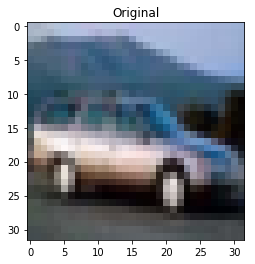

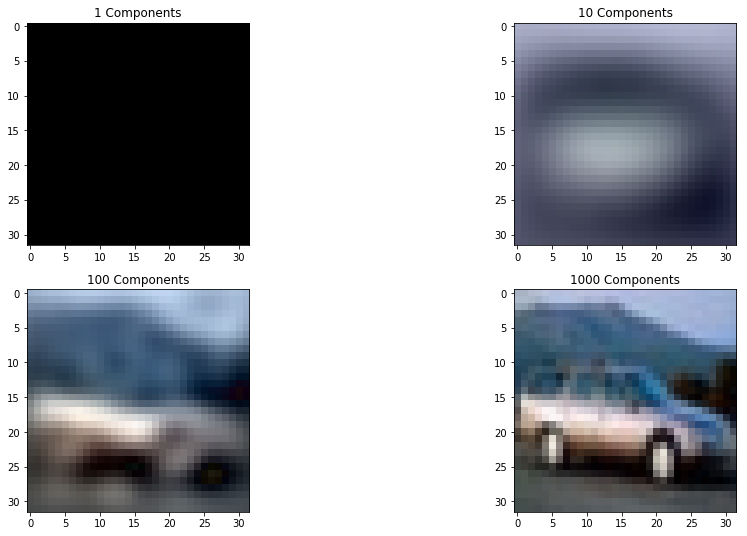

In [308]:
take_vals = [1,10,100,1000]

n_take = 400
shaped = x_train[4].reshape(32*32*3)
recon = np.zeros([4,32*32*3])
for j, n_take in enumerate(take_vals):
    alphas = np.zeros(n_take)

    for i in range(n_take):
        alphas[i] = shaped @ e_vects[:,-i]
        recon[j] = np.add(recon[j], alphas[i] * e_vects[:,-i],casting='unsafe')

plt.imshow(x_train[4])
plt.title('Original')
plt.show()        
fig, ax = plt.subplots(2,2,figsize=(16,9))
for i,a in enumerate(ax.flatten()):
    a.set_title('{:} Components'.format(take_vals[i]))
    a.imshow(np.abs(recon[i].reshape(32,32,3))/255)
plt.show()



I calculated on my own there but now i'll use the sklearn library for the nice projection on the eigenvectors function that I'll use for KMeans clustering so im not clustering in a 3072 dimensional space.

The SKlean PCA plot looks the same as mine except flipped up down, so I suppose theres a degeneracy in how things get defined.

In [309]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(x_train_flat)
x_train_reduced=pca.transform(x_train_flat)


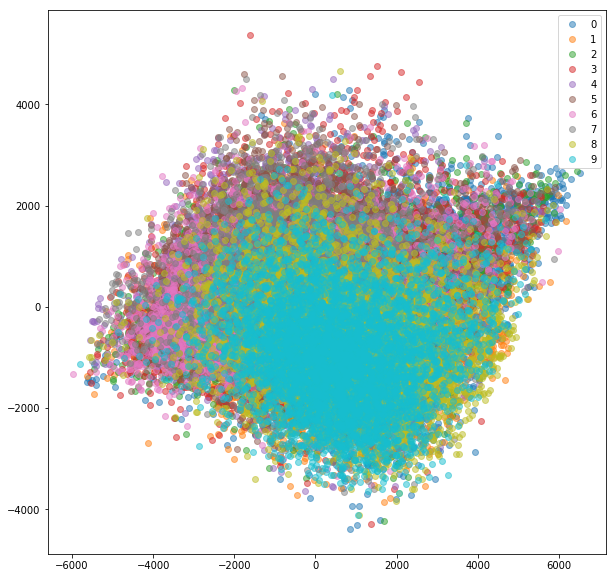

In [310]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.plot(x_train_reduced[np.squeeze(y_train==i),0],
             x_train_reduced[np.squeeze(y_train==i),1],
             'o', label=str(i), alpha=0.5)
plt.gca().legend()
plt.show()

### (c) KMeans

In [117]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=10)
k.fit(x_train_reduced[:,:8])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

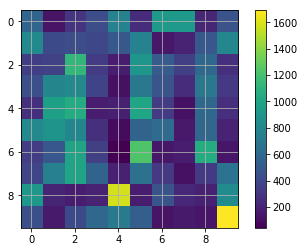

In [311]:
mat = np.zeros((10,10))
for i in range(10):
    mat[i] = np.bincount(k.labels_[np.squeeze(y_train==i)])
plt.imshow(mat,interpolation='nearest')
plt.grid('on')
plt.colorbar()

### (d)

In [123]:
from keras.datasets import mnist as keras_mnist
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

#The data needs to be flattened before being fed into the network (this is not a ConvNet)
train_images_1d = x_train.reshape((50000, 32 * 32 * 3))
train_images_1d = train_images_1d.astype('float32') / 255
test_images_1d = x_test.reshape((10000, 32 * 32*3))
test_images_1d = test_images_1d.astype('float32') / 255

from keras.utils import to_categorical #this just converts the labels to one-hot class
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
h=network.fit(train_images_1d, train_labels, epochs=10, batch_size=128)

Epoch 1/10
50000/50000 [==============================] - 15s 302us/step - loss: 3.1776 - acc: 0.2333
Epoch 2/10
50000/50000 [==============================] - 15s 293us/step - loss: 1.8487 - acc: 0.3353
Epoch 3/10
50000/50000 [==============================] - 15s 293us/step - loss: 1.7322 - acc: 0.3827
Epoch 4/10
50000/50000 [==============================] - 14s 290us/step - loss: 1.6713 - acc: 0.4081
Epoch 5/10
50000/50000 [==============================] - 15s 292us/step - loss: 1.6270 - acc: 0.4229
Epoch 6/10
50000/50000 [==============================] - 15s 291us/step - loss: 1.5908 - acc: 0.4354
Epoch 7/10
50000/50000 [==============================] - 14s 289us/step - loss: 1.5632 - acc: 0.4472
Epoch 8/10
50000/50000 [==============================] - 15s 301us/step - loss: 1.5410 - acc: 0.4555
Epoch 9/10
50000/50000 [==============================] - 15s 307us/step - loss: 1.5195 - acc: 0.4634
Epoch 10/10
50000/50000 [==============================] - 15s 307us/step - loss: 

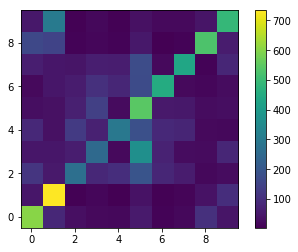

In [163]:
predictions=np.argmax(network.predict(test_images_1d),axis=1)
keras_mat=np.zeros([10,10],dtype='i')
label_v=test_labels.argmax(axis=1)
for i in range(10):
    for j in range(10):
        keras_mat[i,j]=np.bitwise_and(label_v==i , predictions==j).sum()
plt.figure()
plt.imshow(keras_mat,origin='lower')
plt.colorbar()
plt.show()

### Explanation
The neural network matrix tends to have the largest value in a row or column be relatively to stronger to the other column positions compared to the kmeans clustering, demonstrating that the neural network performed better. Obviously here it looks nicer because everything is on the diagonal as this was a supervised learning task unlike the KMeans clustering. 

# Problem 4

The basic algorithim is the place centroids of the clusters randomly in the space of points. Then at each iteration each point is assigned to the cluster of the centroid it is closest to, and the centroids are moved to be at the average of their points. 

# Problem 5
### (a)

In [160]:
p = 300
n = 50
X = np.random.randn(p,n)
C = (X @ X.T)/n
eig_vals = np.linalg.eigvalsh(C)

In [161]:
def MP_law(lamb,p,n):
    lambda_plus = (1- np.sqrt(p/n))**2
    lambda_minus = (1 + np.sqrt(p/n))**2
    return np.sqrt((lambda_plus - lamb)*(lamb-lambda_minus))/(lamb*2*np.pi*p/n)

/home/ianhi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


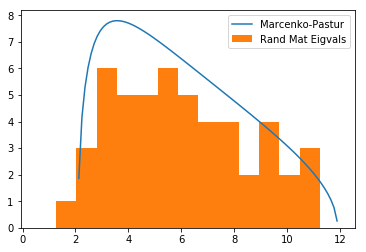

In [162]:
lamb = np.linspace(0.5,12,100)
plt.plot(lamb, MP_law(lamb,p,n)*p, label = 'Marcenko-Pastur')
plt.hist(eig_vals,bins = 15,range=[0.5,12],label='Rand Mat Eigvals')
plt.legend()
plt.show()

Doens't look unreasonable. With more samples it might be closer.